In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
df = df.drop(['id','dataset'],axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.shape

(920, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [6]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
df['sex'] = df['sex'].map({'Male':1, 'Female':0})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,1,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,1,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,1,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,1,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
df['cp'].value_counts()

asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: cp, dtype: int64

In [10]:
df['cp'] = df['cp'].map({'asymptomatic':0, 'non-anginal':1, 'atypical angina':2, 'typical angina':3})
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,1,0,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,1,0,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,1,1,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,0,2,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,0,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,1,3,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,1,0,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,1,0,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [11]:
df['trestbps'] = df['trestbps'].fillna(df['trestbps'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 100.8+ KB


In [12]:
df['chol'] = df['chol'].fillna(df['chol'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 100.8+ KB


In [13]:
df['fbs'].value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [14]:
df['fbs'] = df['fbs'].fillna(False)
df['fbs']=df['fbs'].map({False:int(0),True:int(1)})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 100.8+ KB


In [15]:
df['thalch'] = df['thalch'].fillna(df['thalch'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   918 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 100.8+ KB


In [16]:
df['exang'].value_counts()

False    528
True     337
Name: exang, dtype: int64

In [17]:
df['exang'] = df['exang'].fillna(False)
df['exang']=df['exang'].map({False:int(0),True:int(1)})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   918 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 100.8+ KB


In [18]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [19]:
df['slope'] = df['slope'].map({'upsloping': 0, 'flat': 1, 'downsloping': 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   918 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(6), int64(6), object(2)
memory usage: 100.8+ KB


In [20]:
df['thal'].value_counts()

normal               196
reversable defect    192
fixed defect          46
Name: thal, dtype: int64

In [21]:
df['thal'] = df['thal'].map({'normal': 0, 'fixed defec': 1, 'reversable defect': 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   918 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      388 non-null    float64
 13  num       920 non-null    int64  
dtypes: float64(7), int64(6), object(1)
memory usage: 100.8+ KB


In [22]:
df['restecg'].value_counts()

normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64

In [23]:
df['restecg'] = df['restecg'].map({'normal': 0, 'lv hypertrophy': 1, 'st-t abnormality': 2})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int64  
 2   cp        920 non-null    int64  
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    int64  
 6   restecg   918 non-null    float64
 7   thalch    920 non-null    float64
 8   exang     920 non-null    int64  
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      388 non-null    float64
 13  num       920 non-null    int64  
dtypes: float64(8), int64(6)
memory usage: 100.8 KB


In [24]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       2
thalch        0
exang         0
oldpeak      62
slope       309
ca          611
thal        532
num           0
dtype: int64

In [25]:
from sklearn.impute import KNNImputer

cols = ['oldpeak','slope','ca','thal','restecg']
df_copy = df[cols].copy()

imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_copy), columns=cols)

df_imputed['oldpeak'] = df_imputed['oldpeak'].round().astype(int)
df_imputed['slope'] = df_imputed['slope'].round().astype(int)
df_imputed['ca'] = df_imputed['ca'].round()
df_imputed['thal'] = df_imputed['thal'].round().astype(int)
df_imputed['restecg'] = df_imputed['restecg'].round().astype(int)


df[cols] = df_imputed

In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [27]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.000000,233.0,1,1,150.000000,0,2,2,0.0,2,0
1,67,1,0,160.000000,286.0,0,1,108.000000,1,2,1,3.0,0,2
2,67,1,0,120.000000,229.0,0,1,129.000000,1,3,1,2.0,2,1
3,37,1,1,130.000000,250.0,0,0,187.000000,0,4,2,0.0,0,0
4,41,0,2,130.000000,204.0,0,1,172.000000,0,1,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,0,127.000000,333.0,1,2,154.000000,0,0,1,0.0,2,1
916,62,1,3,132.132404,139.0,0,2,137.545665,0,1,1,1.0,2,0
917,55,1,0,122.000000,223.0,1,2,100.000000,0,0,1,0.0,2,2
918,58,1,0,132.132404,385.0,1,1,137.545665,0,1,1,1.0,1,0


In [28]:
df['num'] = df['num'].apply(lambda x:1 if x>0 else 0)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.000000,233.0,1,1,150.000000,0,2,2,0.0,2,0
1,67,1,0,160.000000,286.0,0,1,108.000000,1,2,1,3.0,0,1
2,67,1,0,120.000000,229.0,0,1,129.000000,1,3,1,2.0,2,1
3,37,1,1,130.000000,250.0,0,0,187.000000,0,4,2,0.0,0,0
4,41,0,2,130.000000,204.0,0,1,172.000000,0,1,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,0,127.000000,333.0,1,2,154.000000,0,0,1,0.0,2,1
916,62,1,3,132.132404,139.0,0,2,137.545665,0,1,1,1.0,2,0
917,55,1,0,122.000000,223.0,1,2,100.000000,0,0,1,0.0,2,1
918,58,1,0,132.132404,385.0,1,1,137.545665,0,1,1,1.0,1,0


# Data Splitting

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('num',axis = 1)
y = df['num']
X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Training Sample = {X_train.shape[0]} | Testing Sample = {X_test.shape[0]}")

Training Sample = 736 | Testing Sample = 184


# Data Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [31]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15752\4048195797.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [32]:
y_pred = model.predict(X_test_scaled)

# Model Evaluation

In [33]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy Score : ", accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

Accuracy Score :  0.8641304347826086

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84        75
           1       0.90      0.86      0.88       109

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



# Visualisation

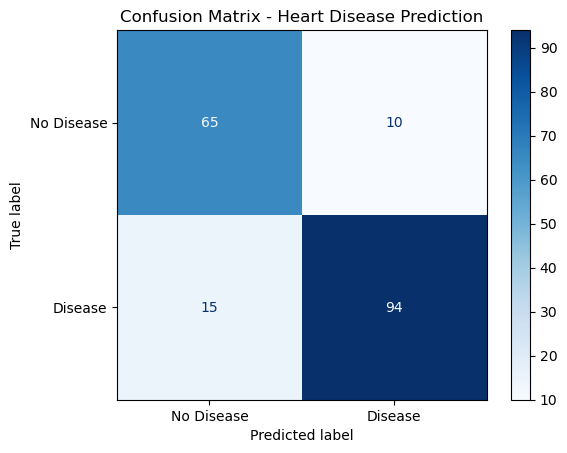

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Heart Disease Prediction")
plt.grid(False)
plt.show()

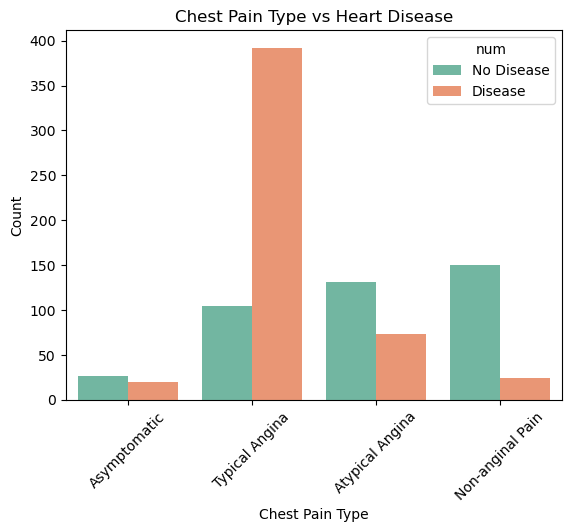

In [35]:
cp_map = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-anginal Pain', 3: 'Asymptomatic'}
sns.countplot(
    x=df['cp'].map(cp_map), 
    hue=df['num'].map({0: 'No Disease', 1: 'Disease'}),
    palette='Set2'
)
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.title("Chest Pain Type vs Heart Disease")
plt.xticks(rotation=45)
plt.show()

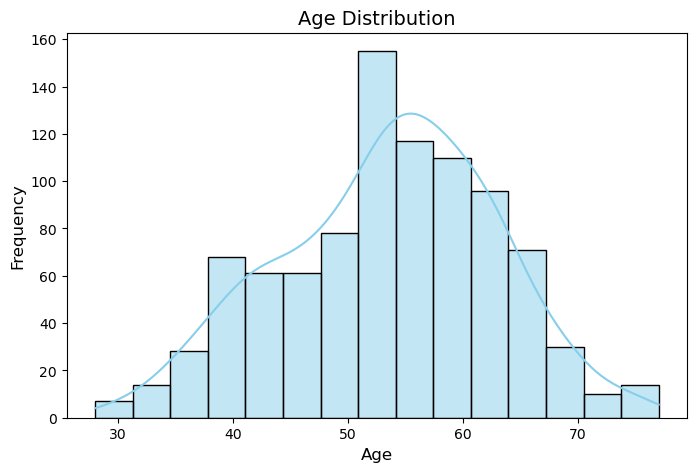

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x='age', 
    bins=15, 
    kde=True, 
    color='skyblue'
)
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

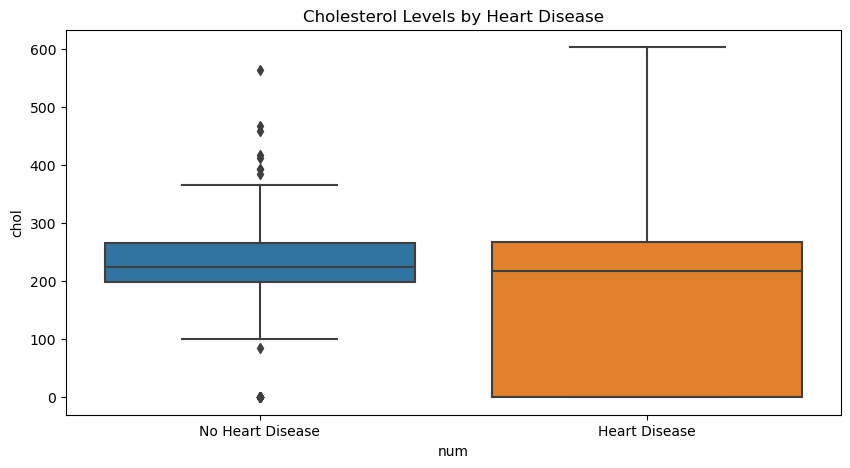

In [37]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x=df['num'].map({0: 'No Heart Disease', 1: 'Heart Disease'}),
    y='chol',
    data=df
)
plt.title('Cholesterol Levels by Heart Disease')
plt.show()

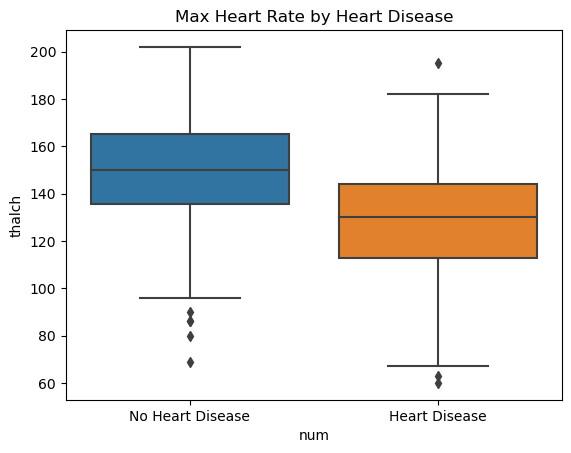

In [39]:
sns.boxplot(
    x=df['num'].map({0: 'No Heart Disease', 1: 'Heart Disease'}), 
    y='thalch',
    data=df
           )
plt.title('Max Heart Rate by Heart Disease')
plt.show()